### LIF MODEL : Modeling Neuronal Recovery: The Refractory Period Explained

This section demonstrates the simulation of a Leaky Integrate-and-Fire (LIF) model neuron with the inclusion of a refractory period, mimicking the biological recovery phase after a neuron fires an action potential (spike). We will go through the code step by step, explaining its components and the underlying biological theory.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
V_rest = -52      # Resting potential (baseline membrane voltage) from Kakaria and de Bivort, 2017
V_reset = -52     # Voltage after the neuron spikes (reset potential)from Kakaria and de Bivort, 2017
V_threshold = -45 # Voltage at which the neuron fires a spike from Kakaria and de Bivort, 2017
R_m = 10          # Membrane resistance (determines voltage change due to input current) from Kakaria and de Bivort, 2017
tau_m = 5         # Membrane time constant (affects decay rate of voltage) Synapse decay time scale, Jürgensen et al., 2021.
dt = 0.05         # Time step size for simulation (how finely we divide time)
refractory_period = 5  # Time after a spike during which the neuron cannot spike again

Refractory period:The period (in ms) during which the neuron cannot fire after a spike, reflecting the biological concept of refractory periods.

In [36]:
# Simulation parameters
simulation_time = 1000  # Total simulation time (ms)
timeVector = np.arange(0, simulation_time, dt)
num_steps = len(timeVector)

# Input current (nA) with noise
stimVector = np.zeros(num_steps)
stimVector[0:int(200/dt)] = 0.7     # 0.7 nA for first 200 ms
stimVector[int(400/dt):int(600/dt)] = 1.5  # 1.5 nA from 400-600 ms
stimVector[int(800/dt):int(900/dt)] = 2.5  # 2.5 nA from 800-900 ms
stimVector += np.random.normal(0, 0.1, size=num_steps)  # Add Gaussian noise

# Explanation:
# - stimVector defines the input current at each time step.
# - Noise (Gaussian) is added to make the simulation more realistic.

Additionally, random noise is added to the stimulus, modeled using a normal distribution with mean 0 and standard deviation 0.1, representing stochastic or noisy inputs

In [37]:
# Initialize membrane potential and spike times
voltageVector = np.zeros(num_steps)
voltageVector[0] = V_rest
spike_times = []

# Initialize refractory period tracker
refractory_steps = int(refractory_period / dt)
last_spike_step = -np.inf  # No spikes initially

# Explanation:
# - voltageVector stores the membrane potential over time.
# - spike_times keeps track of when spikes occur.
# - refractory_steps ensures the neuron does not spike during the refractory period.

In [38]:
# Simulation loop
for S in range(num_steps - 1):
    if (S - last_spike_step) < refractory_steps:
        # Neuron is in refractory period
        voltageVector[S + 1] = V_reset
    else:
        # Calculate V_inf (steady-state potential)
        V_inf = V_rest + R_m * stimVector[S]
        
        # Update membrane potential using exponential decay formula
        voltageVector[S + 1] = V_inf + (voltageVector[S] - V_inf) * np.exp(-dt / tau_m)
        
        # Check for spike
        if voltageVector[S + 1] >= V_threshold:
            spike_times.append(timeVector[S + 1])  # Log spike time
            voltageVector[S + 1] = V_reset        # Reset membrane potential
            last_spike_step = S + 1  # Update last spike step

# Explanation:
# - Exponential decay models the passive decay of the membrane potential.
# - When the potential exceeds V_threshold, a spike is recorded, and the potential is reset.

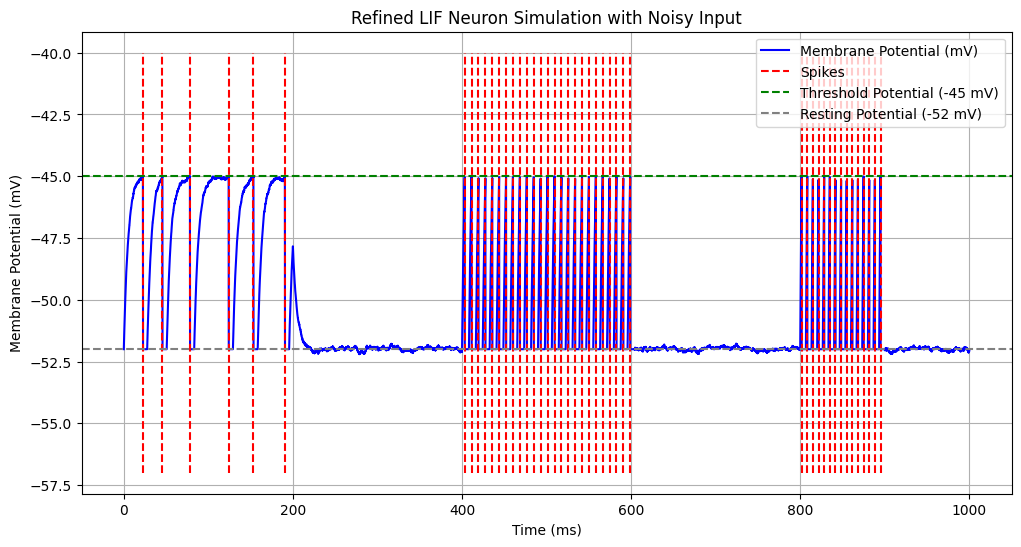

In [39]:
# Plotting results
plt.figure(figsize=(12, 6))

# Plot membrane potential
plt.plot(timeVector, voltageVector, label="Membrane Potential (mV)", color="blue")

# Mark spike times
if spike_times:
    plt.vlines(spike_times, ymin=V_rest - 5, ymax=V_threshold + 5, color="red", linestyle="--", label="Spikes")

# Add horizontal lines for threshold and resting potential
plt.axhline(V_threshold, color='green', linestyle='--', label="Threshold Potential (-45 mV)")
plt.axhline(V_rest, color='gray', linestyle='--', label="Resting Potential (-52 mV)")

# Add labels, legend, and title
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Refined LIF Neuron Simulation with Noisy Input')
plt.legend()
plt.grid(True)
plt.show()

# Explanation:
# - The membrane potential is plotted over time.
# - Spikes are marked as vertical lines for easy visualization.
# - Threshold and resting potentials are shown as reference lines.

-  Blue Line: Represents the neuron's membrane potential over time.
-  Red Vertical Lines: Indicate the times when the neuron spikes, showing how the refractory period prevents the neuron from firing again until it's recovered.
-  Threshold Line (Green): Represents the threshold potential above which the neuron will fire.
-  Resting Potential Line (Gray): Shows the resting potential of the neuron.

Biological Significance of the Refractory Period
The refractory period in biological neurons plays a crucial role in shaping their firing patterns and behavior:

- Prevents Over-excitation: After a spike, neurons are less excitable, preventing them from firing too rapidly in response to continuous stimuli. This ensures a more controlled firing rate, essential for the proper functioning of neural circuits.

- Regulates Firing Rate: The refractory period directly affects how often a neuron can fire, thus regulating its firing rate. This is important for processes like signal encoding and transmission in the brain.

- Spike Timing: The refractory period contributes to the temporal structure of neuronal activity, which is critical for various brain functions, such as learning, memory, and sensory processing.

